In [277]:
import numpy as np
np.set_printoptions(threshold=np.nan)

from astropy.io import fits
from astropy.units import degree, kpc
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS

import plotly
from plotly.offline import plot, iplot
import plotly.graph_objs as go

from matplotlib import pyplot as plt

In [253]:
data = fits.open('yulong.fits')
len(data)

9010

### Data Model

**PrimaryHDU**

In [3]:
data[0]

In [4]:
data[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 

**BinaryTableHDU**

In [6]:
data[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   24 / width of table in bytes                        
NAXIS2  =                 1474 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    3 / number of fields in each row                   
TTYPE1  = 'LAMBDA  '           / label for field   1                            
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TUNIT1  = 'Angstrom'           / physical unit of field                         
TTYPE2  = 'DELTA_T '           / label for field   2                            
TFORM2  = 'D       '        

In [7]:
data[1].data.shape

(1474,)

In [329]:
data[1].data['DELTA_T']

array([ -1.46544970e-01,   3.88683491e-01,   3.66131480e-01,
        -5.34000803e-01,  -9.99808430e-01,  -6.16153577e-01,
         3.40150460e-01,   3.64154008e-01,  -4.70043288e-01,
        -9.23251870e-01,   2.84240537e-01,   4.65931924e-01,
        -6.41863188e-02,  -6.29347117e-02,  -9.99960474e-01,
        -9.99999743e-01,   4.61825187e-01,   1.15857454e-01,
        -1.26649146e-01,  -1.00000000e+00,  -9.00564005e-03,
         3.57052092e-01,   4.05402282e-01,   4.60516327e-01,
        -3.35853302e-02,   1.05747317e-01,   4.08904467e-01,
         6.88982386e-02,   4.66949552e-01,   4.33605941e-01,
         4.03682793e-01,  -1.00000000e+00,  -7.67083158e-02,
         4.64665958e-01,   5.10972768e-01,   1.28704136e-01,
         4.54716344e-01,  -6.97857367e-01,   2.76444547e-01,
         4.75192629e-01,   2.20991967e-02,  -7.91278541e-01,
         3.70079752e-01,   4.84753017e-01,   2.00878932e-01,
         4.86814442e-01,  -1.00000000e+00,   4.02654724e-01,
         3.95295394e-01,

## 2D Visualization

In [315]:
def plotting3d(x, y, z):
    trace = go.Scatter3d(
        x=x,
        y=x,
        z=z,
        mode='markers',
        marker=dict(
            size=5,
            opacity=0.5
        )
    )
    layout = go.Layout(
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        )
    )
    fig = go.Figure(data=[trace], layout=layout)
    return fig

### Extracting Coordinates from Header

In [316]:
ra_list = []
for i in range(1,8733):
    ra_list.append(data[i].header['RA'])
ras = np.array(ra_list)
ras.shape

(8732,)

In [312]:
dec_list = []
for i in range(1,8733):
    dec_list.append(data[i].header['DEC'])
decs = np.array(dec_list)
decs.shape

(8732,)

In [313]:
z_list = []
for i in range(1,8733):
    z_list.append(data[i].header['Z'])
zs = np.array(z_list)
zs.shape

(8732,)

### Building Coordinate Systems

In [158]:
quasar_2d = SkyCoord(ra=ras*degree, dec=decs*degree, distance=zs*kpc, frame='icrs')
quasar_2d.shape

(8732,)

###  Astronomical Coordinate Systems - Equatorial

In [187]:
ra = quasar_2d[:].ra.value

In [188]:
dec = quasar_2d[:].dec.value

In [190]:
dis1 = quasar_2d[:].distance.value

In [191]:
rel_dis1 = dis1/dis1.max()

In [193]:
color1 = np.zeros((quasar_2d.shape[0], 4))
color1[:,3] = rel_dis1

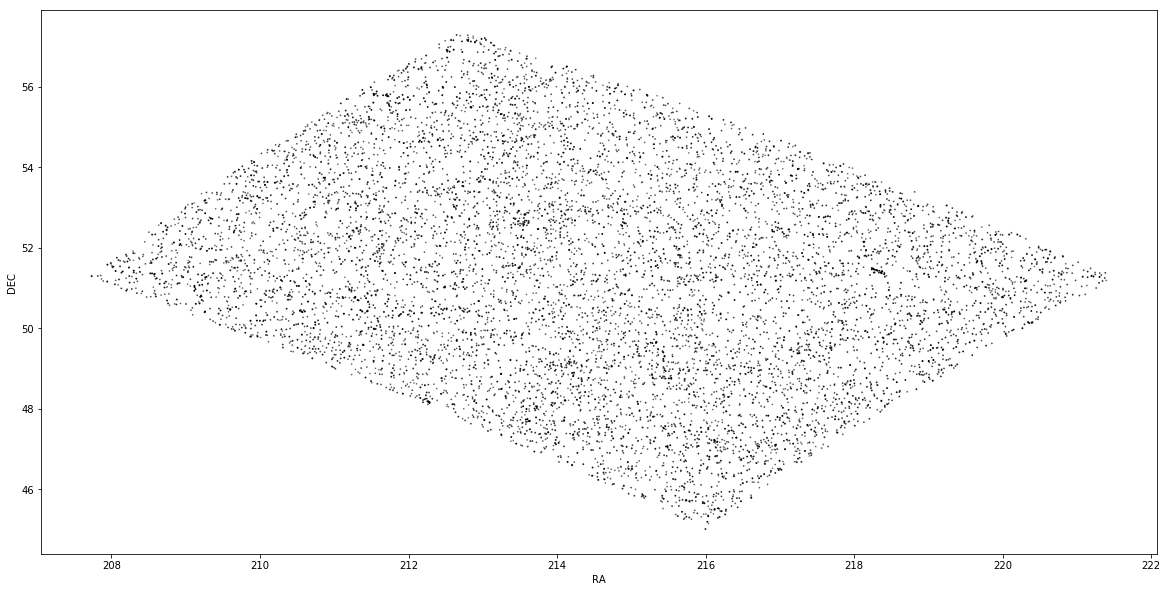

In [194]:
plt.figure(figsize=(20,10))
plt.scatter(ra, dec, s=rel_dis1, c=color1)
# plt.scatter(lon2, lat2, s=0.5, c='k')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()

In [327]:
plot(plotting3d(ra,dec,dis1), filename='2dEquatorial')

/Applications/anaconda3/lib/python3.6/site-packages/plotly/offline/offline.py:463: UserWarning:

Your filename `2dEquatorial` didn't end with .html. Adding .html to the end of your file.



'file:///Users/yulong/Codes/astro-void/2dEquatorial.html'

###  Astronomical Coordinate Systems - Galactic

In [160]:
quasar_galactic = quasar_2d.galactic
quasar_galactic.shape

(8732,)

In [163]:
lon = quasar_galactic[:].l.value

In [164]:
lat = quasar_galactic[:].b.value

In [195]:
dis2 = galactic[:].distance.value

In [196]:
rel_dis2 = dis2/dis2.max()

In [197]:
color2 = np.zeros((quasar_galactic.shape[0], 4))
color2[:,3] = rel_dis2

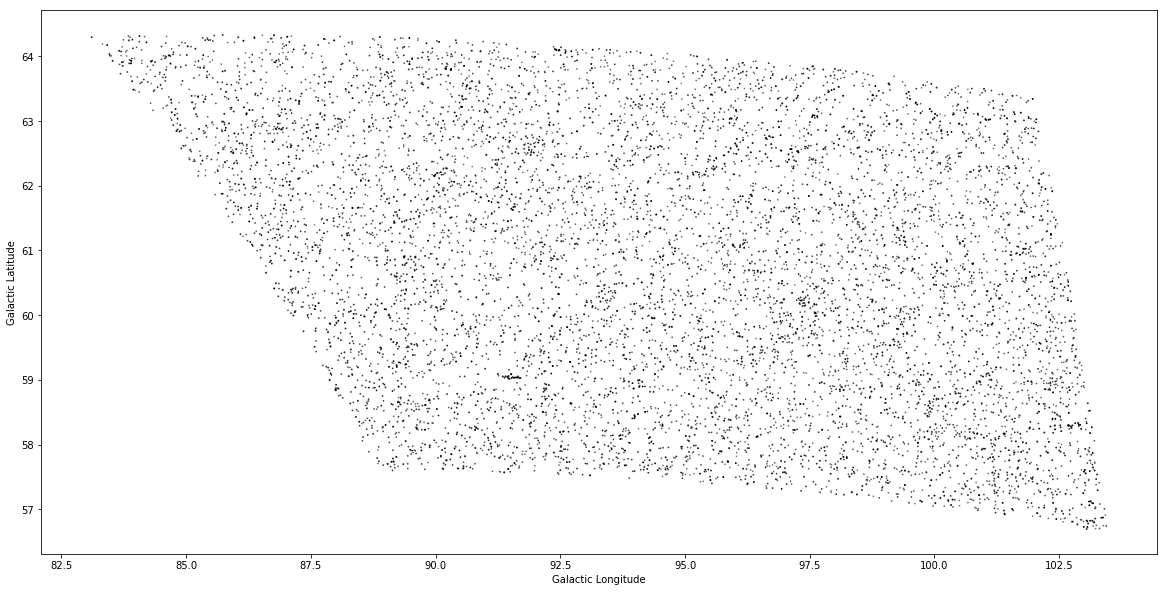

In [198]:
plt.figure(figsize=(20,10))
plt.scatter(lon, lat, s=rel_dis2, c=color2)
# plt.scatter(lon2, lat2, s=0.5, c='k')
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')
plt.show()

In [318]:
plot(plotting3d(lon,lat,dis2), filename='2dGalactic')

/Applications/anaconda3/lib/python3.6/site-packages/plotly/offline/offline.py:463: UserWarning:

Your filename `2dGalactic` didn't end with .html. Adding .html to the end of your file.



'file:///Users/yulong/Codes/astro-void/2dGalactic.html'

### Cartesian Coordinate System

In [199]:
quasar_cartesian = quasar_2d.cartesian
quasar_cartesian.shape

(8732,)

In [200]:
quasar_cartesian[0]

<CartesianRepresentation (x, y, z) in kpc
    (-1.91504947, -1.197426,  2.73433743)>

In [201]:
x = quasar_cartesian[:].x.value

In [202]:
y = quasar_cartesian[:].y.value

In [203]:
z = quasar_cartesian[:].z.value

In [206]:
rel_z = z/z.max()

In [207]:
color3 = np.zeros((quasar_cartesian.shape[0], 4))
color3[:,3] = rel_z

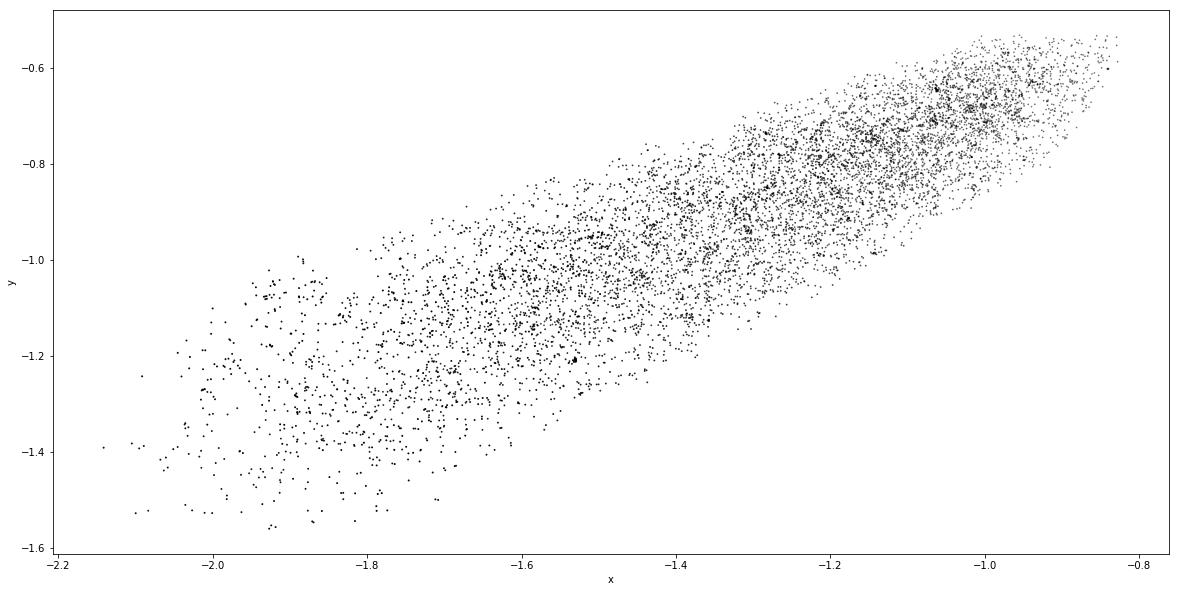

In [210]:
plt.figure(figsize=(20,10))
plt.scatter(x, y, s=rel_z, c=color3)
# plt.scatter(lon2, lat2, s=0.5, c='k')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [319]:
plot(plotting3d(x,y,z), filename='2dCartesian')

/Applications/anaconda3/lib/python3.6/site-packages/plotly/offline/offline.py:463: UserWarning:

Your filename `2dCartesian` didn't end with .html. Adding .html to the end of your file.



'file:///Users/yulong/Codes/astro-void/2dCartesian.html'

## 3D Visualization

In [337]:
def GetSkyCoord(data):
    ra = data.header['RA']
    dec = data.header['DEC']
    depth = data.data['RCOMOV']
    field = data.data['DELTA_T']
    sc = SkyCoord(ra=ra*degree, dec=dec*degree, distance=depth*kpc, frame='icrs')
    return sc, field

In [338]:
data3d = []

In [339]:
for i in range(1,100):
    sc, field = GetSkyCoord(data[i])
    cart = sc.cartesian
    trace = go.Scatter3d(
        x=cart[:].x.value,
        y=cart[:].y.value,
        z=cart[:].z.value,
        mode='markers',
        marker=dict(
            size=1,
            color=field,
            opacity=0.1
        )
    )
    data3d.append(trace)

In [340]:
fig = go.Figure(data=data3d, layout=layout)

In [343]:
plot(fig, filename='3dCartesian')

/Applications/anaconda3/lib/python3.6/site-packages/plotly/offline/offline.py:463: UserWarning:

Your filename `3dCartesian` didn't end with .html. Adding .html to the end of your file.



'file:///Users/yulong/Codes/astro-void/3dCartesian.html'